In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In /home/analysis_user/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/analysis_user/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/analysis_user/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/analysis_user/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/analysis_user/.local/lib/python3.6/

In [2]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [167]:
Year = "2020"
Month = "08"
Day = "09"
BeadNumber =1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [168]:
Data_File_Number=60
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Data_File_Number
#fname="/data/new_trap/20200809/Bead1/Discharge/Discharge_%d.h5" % Data_File_Number
#fname= "/data/new_trap/20200614/Bead1/Discharge/Discharge3/ForceCalibration/Z4.h5"
#fname = folder+"/NoBead"+"/InitialTest"+"/Data%d.h5" % Data_File_Number
#fname = folder + "/Bead" + str(BeadNumber)+"/Discharge"+"/Recharge"+"/Discharge_%d.h5" %Data_File_Number
#fname="/data/new_trap/20200618/Bead1/TransFunc/TransFunc_Y_m3e5_250s_7Hz.h5"

print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
fsamp=5000
res = 5000

data=BDF.xyz
trigger = BDF.trigger
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]
xpsd, freqs = matplotlib.mlab.psd(data_det[0][225:], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000[225:], Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000[225:], Fs = fsamp, NFFT = res)

/home/data_transfer/data_from_windows/20200809/Bead1/InitialTest/Data60.h5
No height data
No electrodes data
No cantilever data
No laser power data


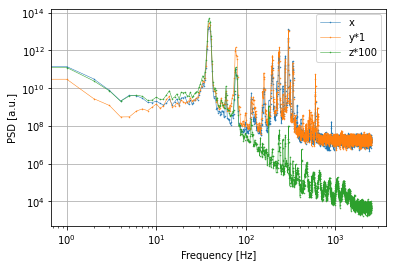

39.0 maximum x
39.0 maximum y
4768056.3264568625 minimum x
5170372.696874358 minimum y


In [169]:
plt.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
plt.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
plt.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e6,1e10)
plt.grid(True)
plt.show()
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")


39.0 maximum x
39.0 maximum y
4768056.3264568625 minimum x
5170372.696874358 minimum y
/home/data_transfer/data_from_windows/20200809/Bead1/InitialTest/Data60.png


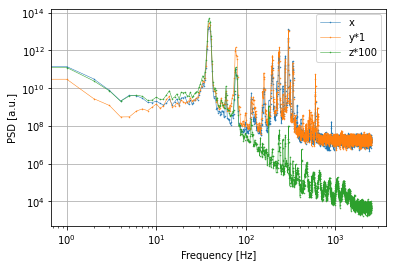

In [170]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e6,1e10)
plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")

ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.png" % Data_File_Number
#ofname="picture.png"
#ofname=folder+"/NoBead"+"/InitialTest"+"/Data%d.png" % Data_File_Number

print(ofname)
#plt.savefig(ofname, dpi =300)

In [186]:
Compare_File_1 = 71
Compare_File_2 = 71

#fname_1 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_1
#fname_2 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_2

fname_1 = "/data/new_trap/20200809/Bead1/BeamProfile/BeamProfileX1_10.h5"
fname_2 = "/data/new_trap/20200809/Bead1/BeamProfile/BeamProfileX1_10.h5"

#fname_1 = "/data/new_trap/20200809/Bead1/Discharge/Discharge_%d.h5" % Compare_File_1
#fname_2 = "/data/new_trap/20200809/Bead1/Discharge/Discharge_%d.h5" % Compare_File_2

#fname_1 = "/data/new_trap/20200730/Bead1/Discharge/Discharge_%d.h5" % Compare_File_1
#fname_2 = "/data/new_trap/20200730/Bead1/Discharge/Discharge_%d.h5" % Compare_File_2

res = 5000

BDF = BeadDataFile.BeadDataFile(fname_1)
data1 = BDF.xyz2
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)

BDF = BeadDataFile.BeadDataFile(fname_2)
data2 = BDF.xyz
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)


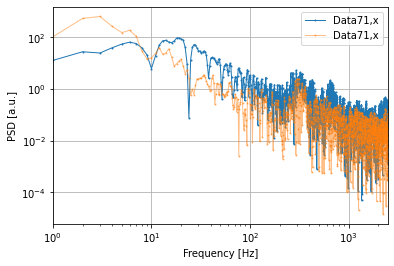

In [187]:
_,ax = plt.subplots()
label1='Data%d,x' % Compare_File_1
label2='Data%d,x' % Compare_File_2
ax.loglog(freqs1, xpsd1/xpsd1.mean(), '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, xpsd2/xpsd2.mean(), '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata
#ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataX%d_%d.png" % (Compare_File_1,Compare_File_2)
#plt.savefig("Temporary_Plots/Anderson/"+"/DataX%d_%d.png" % (Compare_File_1,Compare_File_2))

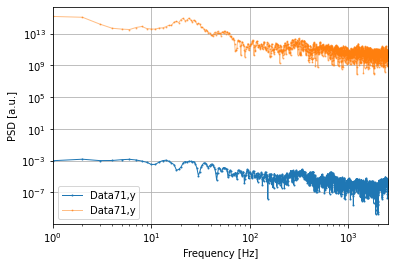

In [188]:
_,ax = plt.subplots()
label1='Data%d,y' % Compare_File_1
label2='Data%d,y' % Compare_File_2
ax.loglog(freqs1, ypsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, ypsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataY%d_%d.png" % (Compare_File_1,Compare_File_2)
#plt.savefig(ofname)plt.savefig("Temporary_Plots/Anderson/"+"/DatYX%d_%d.png" % (Compare_File_1,Compare_File_2))

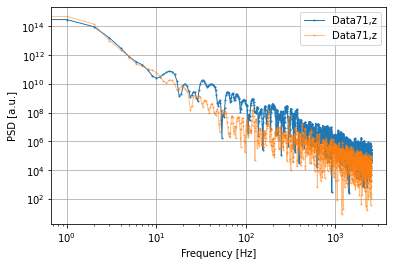

In [189]:
_,ax = plt.subplots()
label1='Data%d,z' % Compare_File_1
label2='Data%d,z' % Compare_File_2
ax.loglog(freqs1, zpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, zpsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')#plt.xlim(100,175)
#plt.ylim(1e5,1e10)
plt.grid(True)
ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataZ%d_%d.png" % (Compare_File_1,Compare_File_2)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
#plt.savefig(ofname)
#plt.savefig("Temporary_Plots/Anderson/"+"/DataZ%d_%d.png" % (Compare_File_1,Compare_File_2))

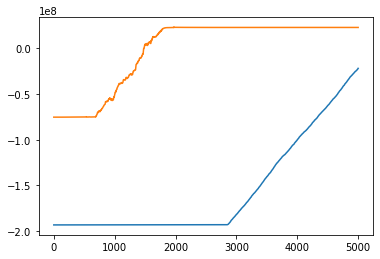

In [191]:
plt.plot(data2[2])
plt.plot(data1[2])

In [247]:
Year = "2020"
Month = "03"
Day = "20"
BeadNumber =1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [248]:
Compare_File_1 = 38

fname_1 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_1
res = 5000
#fname_2 = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_2

BDF = BeadDataFile.BeadDataFile(fname_1)
data1 = BDF.xyz2
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)



#BDF = BeadDataFile.BeadDataFile(fname_2)
#data2 = BDF.xyz2
#data_det2=signal.detrend(data2)
#xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
#ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
#zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)


No height data
No electrodes data
No cantilever data
No laser power data


<IPython.core.display.Javascript object>


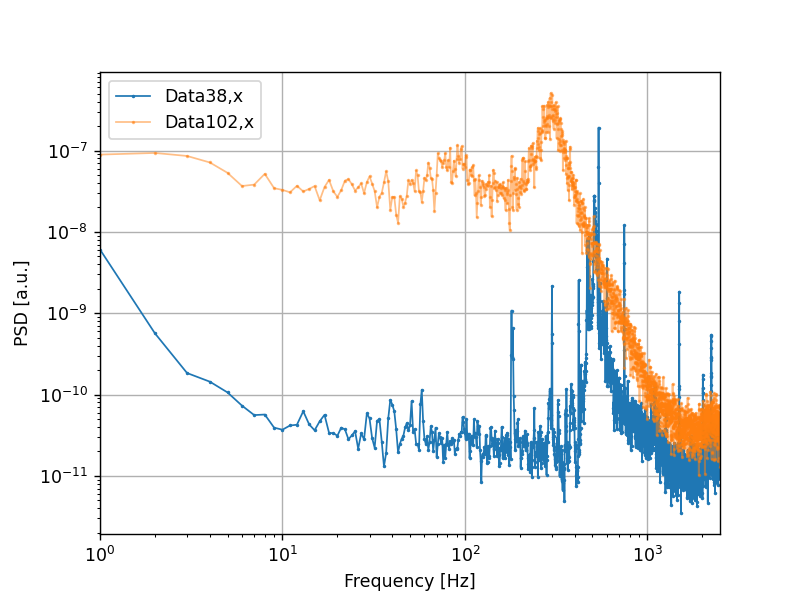

In [249]:
_,ax = plt.subplots()
label1='Data%d,x' % Compare_File_1
label2='Data%d,x' % Compare_File_2
ax.loglog(freqs1, xpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, xpsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata
ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataX%d_%d.png" % (Compare_File_1,Compare_File_2)
#plt.savefig(ofname)

<IPython.core.display.Javascript object>


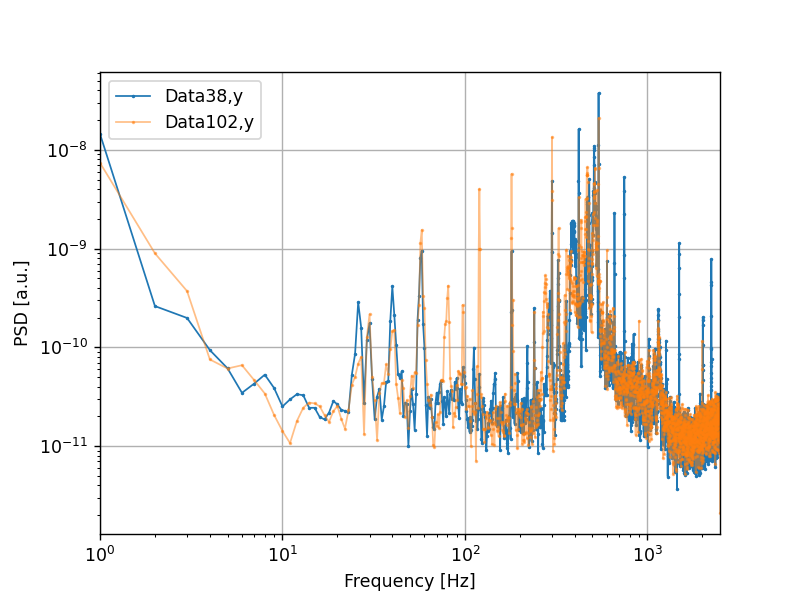

In [235]:
_,ax = plt.subplots()
label1='Data%d,y' % Compare_File_1
label2='Data%d,y' % Compare_File_2
ax.loglog(freqs1, ypsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, ypsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataY%d_%d.png" % (Compare_File_1,Compare_File_2)
#plt.savefig(ofname)

<IPython.core.display.Javascript object>


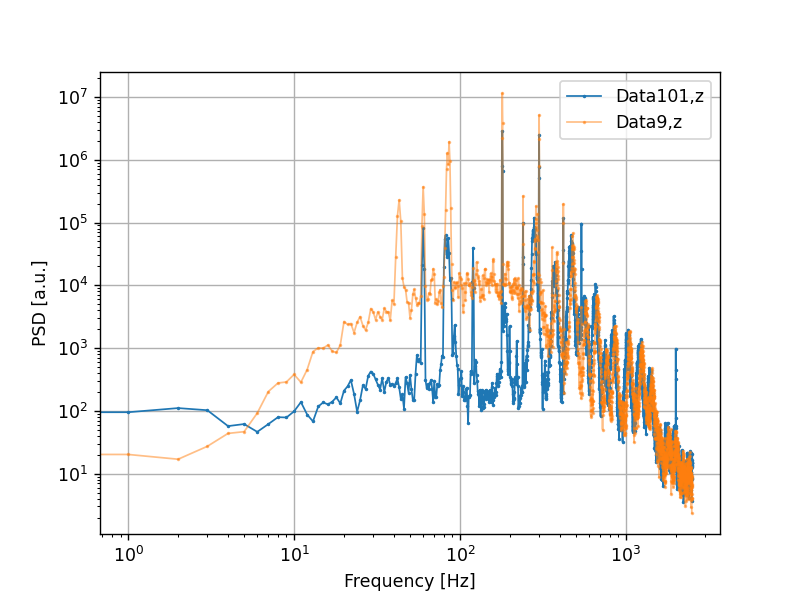

In [178]:
_,ax = plt.subplots()
label1='Data%d,z' % Compare_File_1
label2='Data%d,z' % Compare_File_2
ax.loglog(freqs1, zpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, zpsd2, '.-', label=label2,markersize=2,linewidth=1,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')#plt.xlim(100,175)
#plt.ylim(1e5,1e10)
plt.grid(True)
ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataZ%d_%d.png" % (Compare_File_1,Compare_File_2)
#ofname='/home/analysis_user/Results/Plots/20190724/NoBead/NoiseTest/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
plt.savefig("Temporary_Plots/wilson_1406")

In [195]:
fname="/home/data_transfer/data_from_windows//Testdata/20200806/Discharge_6.h5"
# fname = r'/home/data_transfer/data_from_windows/Testdata/20200805/Discharge_4.h5'

In [196]:
BDF = BeadDataFile.BeadDataFile(fname)

In [197]:
data1=BDF.z2
data2=BDF.Iz
data3=BDF.xyz
data4=BDF.feedback
t = BDF.trigger
index_ = np.nonzero(t)[0][0]

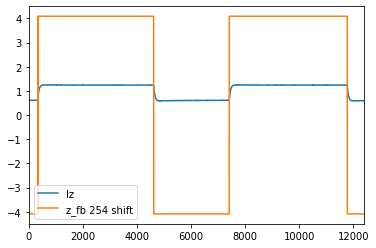

In [199]:
plt.plot(data1/data1.mean())
# plt.plot(data2/data2.mean(),label="Iz")
plt.plot(data3[2][index_/data3[2].mean())
# plt.plot(data4[2][index_:]/data4[2].mean(),label="z_fb "+str(index_)+" shift")
#plt.plot(data4[2]/data4[2].mean(),label="z_fb")

#plt.plot(t/50,label="trigger")
plt.xlim(0,12380)
plt.legend()
plt.show()

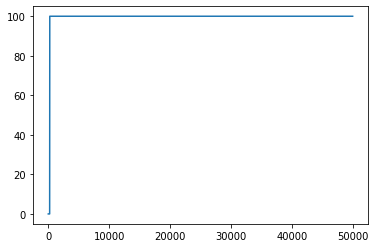

In [10]:
plt.plot(t)

In [124]:
t[224:315]

array([ 29, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
      dtype=int32)

In [62]:
Compare_File_1 = 1
Compare_File_2 = 2

fname_1 = fname #folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_1
fname_2 = fname #folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Compare_File_2


res = 5000

BDF = BeadDataFile.BeadDataFile(fname_1)
data1 = BDF.xyz
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)

BDF = BeadDataFile.BeadDataFile(fname_2)
data2 = BDF.xyz2
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)



xpsd3, freqs1 = matplotlib.mlab.psd(data_det1[0][225:], Fs = fsamp, NFFT = res)
ypsd3, freqs1 = matplotlib.mlab.psd(data_det1[1][225:], Fs = fsamp, NFFT = res)
zpsd3, freqs1 = matplotlib.mlab.psd(data_det1[2][225:], Fs = fsamp, NFFT = res)

BDF = BeadDataFile.BeadDataFile(fname_2)
data_det2=signal.detrend(data2)
xpsd4, freqs4 = matplotlib.mlab.psd(data_det2[0][225:], Fs = fsamp, NFFT = res)
ypsd4, freqs4 = matplotlib.mlab.psd(data_det2[1][225:], Fs = fsamp, NFFT = res)
zpsd4, freqs4 = matplotlib.mlab.psd(data_det2[2][225:], Fs = fsamp, NFFT = res)

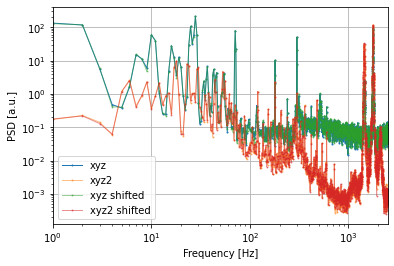

In [65]:
_,ax = plt.subplots()
label1='Data%d,x' % Compare_File_1
label2='Data%d,x' % Compare_File_2
ax.loglog(freqs1, xpsd1/xpsd1.mean(), '.-', label="xyz",markersize=2,linewidth=1)
ax.loglog(freqs2, xpsd2/xpsd2.mean(), '.-', label="xyz2",markersize=2,linewidth=1,alpha=0.5)
ax.loglog(freqs4, xpsd3/xpsd3.mean(), '.-', label="xyz shifted",markersize=2,linewidth=1,alpha=0.5)
ax.loglog(freqs4, xpsd4/xpsd4.mean(), '.-', label="xyz2 shifted",markersize=2,linewidth=1,alpha=0.5)


ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
#plt.ylim(1e5,1e10)
plt.grid(True)

#ofname='../Documents/AkioK/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata
#ofname='../Documents/AkioK/Shaking%d.png' % Ndata
#ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/DataX%d_%d.png" % (Compare_File_1,Compare_File_2)
#plt.savefig("Temporary_Plots/Anderson/"+"/DataX%d_%d.png" % (Compare_File_1,Compare_File_2))